# Занятие 5. Анализ данных. Подготовка и предобработка данных
Данные не всегда поступают в форме, готовой для анализа. Например, они могут иметь неправильный формат, быть ошибочными, а то и вовсе отсутствовать. Опыт показывает, что специалисты по data science тратят до 75% своего времени на подготовку данных перед началом анализа. Подготовка данных называется <i>первичной обработкой</i>, два важнейших шага которой заключаются 
в <i>очистке данных</i> и последующем <i>преобразовании данных</i> в форматы, оптимальные для ваших систем баз данных и аналитических программ. Несколько типичных примеров очистки данных:
<ul>
    <li>удаление наблюдений с отсутствующими значениями;</li>
    <li>замена отсутствующих значений подходящими значениями;</li>
    <li>удаление наблюдений с некорректными значениями;</li>
    <li>замена некорректных значений подходящими значениями;</li>
    <li>исключение выбросов (хотя в некоторых случаях их лучше оставить);</li>
    <li>устранение дубликатов (хотя некоторые дубликаты содержат действительную информацию);</li>
    <li> обработка с данными, целостность которых была нарушена</li>
    <li>и так далее.</li>
</ul>
Вероятно, вы уже думаете, что очистка данных — сложный и хлопотный процесс, в котором легко можно принять ошибочные решения, отрицательно сказывающиеся на ваших результатах. Да, все правильно. Когда мы дойдем до практических примеров data science в следующих главах, вы увидите, что data science в большей степени является <i>дисциплиной эмпирической</i>, как медицина, и в меньшей степени — дисциплиной теоретической, как теоретическая физика. В эмпирических дисциплинах выводы делаются на основании наблюдений и практического опыта. Например, многие лекарства, эффективно решающие современные медицинские проблемы, были получены на основе наблюдения за воздействием ранних версий этих лекарств на лабораторных животных, а в конечном итоге и на людей и постепенного уточнения ингредиентов и дозировок. Действия специалистов data science могут изменяться в зависимости от проекта, могут зависеть от качества и природы данных, а также от развивающихся организационных и профессиональных стандартов.
<ul>Примеры типичных преобразований данных:
    <li>удаление необязательных данных и признаков;</li>
    <li>объединение взаимосвязанных признаков;</li>
    <li>формирование выборок данных для получения репрезентативного подмножества (в практических примерах data science вы увидите, что случайная выборка особенно эффективна в этом отношении);</li>
    <li>стандартизация форматов данных;</li>
    <li>группировка данных</li>
</ul>

## 1.1 Загрузка данных

In [2]:
# подгрузка необходимых модулей для визуализации и работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# загрузка данных
data_all = pd.read_csv("data/mammal_atlas.csv")
data_all.head(4).T

0  \
Scientific name                     Capreolus capreolus   
Common name                                    Roe Deer   
Species ID (TVK)                       NHMSYS0000080203   
Taxon Rank                                      species   
Start date                                   31/01/2018   
Start date day                                       31   
Start date month                                      1   
Start date year                                    2018   
Latitude (WGS84)                                57.4002   
Longitude (WGS84)                               -4.2679   
Coordinate uncertainty (m)                         50.0   
Identification verification status   Accepted - correct   
Basis of record                        HumanObservation   
Survey key                            iRecord | Mammals   
Kingdom                                        Animalia   
Phylum                                         Chordata   
Class                                          Mammalia   
Order                                      Artiodactyla   
Family                                         Cervidae   
Genus                                         Capreolus   
Country                                  United Kingdom   
State/Province                                 Scotland   
Vitality                                            NaN   

                                                         1  \
Scientific name                        Erinaceus europaeus   
Common name                         West European Hedgehog   
Species ID (TVK)                          NBNSYS0000005078   
Taxon Rank                                         species   
Start date                                      20/01/2021   
Start date day                                          20   
Start date month                                         1   
Start date year                                       2021   
Latitude (WGS84)                                 51.519214   
Longitude (WGS84)                                -0.738969   
Coordinate uncertainty (m)                            57.0   
Identification verification status      Accepted - correct   
Basis of record                           HumanObservation   
Survey key                                   iRecord | App   
Kingdom                                           Animalia   
Phylum                                            Chordata   
Class                                             Mammalia   
Order                                          Insectivora   
Family                                         Erinaceidae   
Genus                                            Erinaceus   
Country                                     United Kingdom   
State/Province                                     England   
Vitality                                               NaN   

                                                     2                 3  
Scientific name                     Halichoerus grypus    Talpa europaea  
Common name                                  Grey Seal     European Mole  
Species ID (TVK)                      NBNSYS0000005137  NBNSYS0000005079  
Taxon Rank                                     species           species  
Start date                                  06/01/2016        25/01/2017  
Start date day                                       6                25  
Start date month                                     1                 1  
Start date year                                   2016              2017  
Latitude (WGS84)                                  52.8         53.322473  
Longitude (WGS84)                                  1.6         -1.731987  
Coordinate uncertainty (m)                      7071.1              70.7  
Identification verification status            Accepted          Accepted  
Basis of record                       HumanObservation  HumanObservation  
Survey key                           iRecord | Mammals  iRecord | Import  
Kingdom                

## 1.2 Разведочный анализ и очистка данных
### 1.2.1 Информация о признаках

In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227322 entries, 0 to 227321
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Scientific name                     227322 non-null  object 
 1   Common name                         227123 non-null  object 
 2   Species ID (TVK)                    227322 non-null  object 
 3   Taxon Rank                          227322 non-null  object 
 4   Start date                          227322 non-null  object 
 5   Start date day                      227322 non-null  int64  
 6   Start date month                    227322 non-null  int64  
 7   Start date year                     227322 non-null  int64  
 8   Latitude (WGS84)                    227321 non-null  float64
 9   Longitude (WGS84)                   227321 non-null  float64
 10  Coordinate uncertainty (m)          227321 non-null  float64
 11  Identification verificatio

In [10]:
# техническая информация о датасете
 v  

Index(['Start date day', 'Start date month', 'Start date year',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Coordinate uncertainty (m)',
       'Vitality'],
      dtype='object')

В представленном наборе содержатся данные о млекопитающих, которые обитают на территории Великобритании. Датасет содержит следующие признаки:
<ol>
    <li><b>Scientific name и Common name</b> -- научное и обиходное название животного, тип данных object;</li>
    <li><b>Taxon Rank, Kingdom, Phylum, Class, Order, Family, Genus</b> -- данные о месте млекопитающего в таксономической системе (царство животных, класс, род, семейство и т.д.), тип данных object;</li>
    <li><b>Latitude (WGS84), Longitude (WGS84), Coordinate uncertainty (m), Country, State/Province</b> -- географические данные, говорящие о месте нахождения животного, т.е. географические широта и долгота, погрешность координат и страна; тип данных у всех, кроме Country и State/Province, float;</li>
        <li>содержится также некоторая техническая информация: <b>Species ID (TVK)</b> -- идентификатор вида, <b>Basis of Record</b> -- учреждение, которое ведёт запись/учёт, <b>Identification verification status</b> -- статус подтверждения идентификации, а также дата начала записи (<b>Start Date</b>)</li>
</ol>

In [4]:
# посмотреть основные статистики численных признаков
data_all.describe().T

count         mean          std          min  \
Start date day              227322.0    15.539239     8.833260     1.000000   
Start date month            227322.0     6.109365     3.017320     1.000000   
Start date year             227322.0  2016.904202     5.187149  1905.000000   
Latitude (WGS84)            227321.0    52.931642     1.774928    49.174050   
Longitude (WGS84)           227321.0    -1.734658     1.586204   -10.461502   
Coordinate uncertainty (m)  227321.0   659.041594  2088.721995     0.300000   
Vitality                         0.0          NaN          NaN          NaN   

                                    25%          50%        75%           max  
Start date day                 8.000000    16.000000    23.0000     31.000000  
Start date month               4.000000     6.000000     8.0000     12.000000  
Start date year             2015.000000  2018.000000  2020.0000   2023.000000  
Latitude (WGS84)              51.517338    52.622681    53.8654     60.829075  
Longitude (WGS84)             -2.810713    -1.753089    -0.4302      1.900000  
Coordinate uncertainty (m)     7.100000    50.000000    70.7000  70710.700000  
Vitality                            NaN          NaN        NaN           NaN

В статистических характеристиках численных признаков можно заметить признак Vitality, в котором отсутствуют все значения. От него необходимо избавиться.

### 1.2.2 Пропуски в данных
Некорректные и отсутствующие значения в данных могут оказать значительное влияние на анализ данных. Некоторые специалисты data science протестуют против любых попыток вставки «разумных значений». Вместо этого они рекомендуют четко пометить отсутствующие данные и предоставить решение проблемы пакету аналитики данных. Другие советуют действовать более осторожно.

In [5]:
all_records = data_all.shape[0] # 
data_all.isnull().sum()/all_records * 100

Scientific name                         0.000000
Common name                             0.087541
Species ID (TVK)                        0.000000
Taxon Rank                              0.000000
Start date                              0.000000
Start date day                          0.000000
Start date month                        0.000000
Start date year                         0.000000
Latitude (WGS84)                        0.000440
Longitude (WGS84)                       0.000440
Coordinate uncertainty (m)              0.000440
Identification verification status      0.000000
Basis of record                         0.000000
Survey key                              0.000000
Kingdom                                 0.000000
Phylum                                  0.000000
Class                                   0.000000
Order                                   0.059827
Family                                  0.647980
Genus                                   0.877170
Country             

In [6]:
irretrievable_cols = list()
for column in data_all.columns:
    if data_all[column].isnull().sum() / all_records * 100 > 60:
        irretrievable_cols.append(column)
print(f"Невосстановимые признаки, у которых пропусков более 60%: {irretrievable_cols}")
data_all.drop(columns=irretrievable_cols, inplace=True)

Невосстановимые признаки, у которых пропусков более 60%: ['Vitality']


In [7]:
print(f"Всего записей: {all_records}")

Всего записей: 227322


Выше приведены в процентном отношении данные о наличии пропусков. В данных есть пропуски, но менее 1%. Был отобран признак с полностью отсутствующими значениями и удалён из датасета.
С остальными признаками можно поступить следующими способами:
<ol>
    <li>Избавиться от записей с пропусками в датасете;</li>
    <li>Избавиться от всех атрибутов, которые содержат пропуски;</li>
    <li>Установить недостающие значения в некоторую величину (медиану, среднее, моду и т.д.)</li>
</ol>
При подстановке “разумных значений” на место отсутствующих или некорректных данных необходимо действовать очень осторожно. “Подставлять” значения, повышающие статистическую значимость или обеспечивающие более “разумные” или “лучшие” результаты, 
недопустимо. “Подстановка” данных не должна превратиться в “подтасовку” данных. Первое, чему должен научиться исследователь, — не исключать и не изменять значения, противоречащие гипотезам. “Подстановка” разумных значений не означает, что исследователь 
может изменять данные, чтобы получить нужный результат.

В данной ситуации подойдёт удаление отдельных записей с пропусками, поскольку пропусков менее 1%.

In [8]:
data_all.dropna(axis=0, inplace=True)
print(f"Было записей: {all_records}\nСтало записей: {data_all.shape[0]}")

Было записей: 227322
Стало записей: 224934


In [9]:
data_all.isnull().sum()/data_all.shape[0] * 100

Scientific name                       0.0
Common name                           0.0
Species ID (TVK)                      0.0
Taxon Rank                            0.0
Start date                            0.0
Start date day                        0.0
Start date month                      0.0
Start date year                       0.0
Latitude (WGS84)                      0.0
Longitude (WGS84)                     0.0
Coordinate uncertainty (m)            0.0
Identification verification status    0.0
Basis of record                       0.0
Survey key                            0.0
Kingdom                               0.0
Phylum                                0.0
Class                                 0.0
Order                                 0.0
Family                                0.0
Genus                                 0.0
Country                               0.0
State/Province                        0.0
dtype: float64

### 1.2.3 Поиск аномалий и выбросов в данных

Ещё при просмотре основных статистик датасета можно было заметить неадекватное распределение признака Coordinate uncertainty (m), у которого наблюдается завышенное значение: 75-процентиль показывает 70.7 метров, а максимальное значение 70710.7 метров (70км!). Исследуем этот признак детальнее.

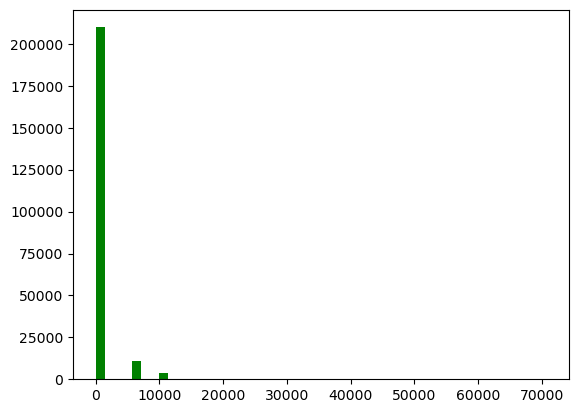

In [10]:
data_all['Coordinate uncertainty (m)'].hist(bins=50,color='green');
plt.grid(False)

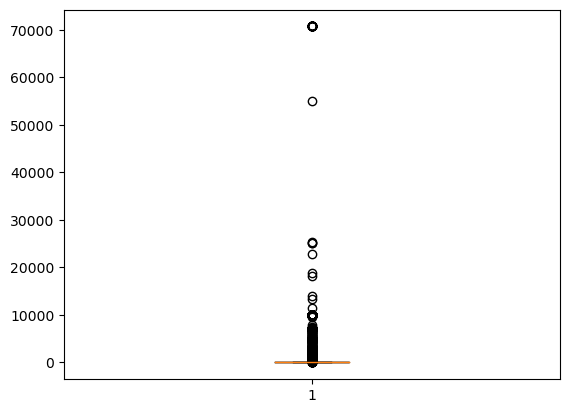

In [11]:
plt.boxplot(data_all['Coordinate uncertainty (m)']);

Признак сильно зашумлён, нужно удалить записи, в которых содержится слишком высокая погрешность измерения координат.

In [12]:
print(f"Количество записей, в которых погрешность более 1км: {len(data_all[data_all['Coordinate uncertainty (m)'] > 1_000])}")
print(f"Количество записей, в которых погрешность более 2км: {len(data_all[data_all['Coordinate uncertainty (m)'] > 2_000])}")

Количество записей, в которых погрешность более 1км: 16586
Количество записей, в которых погрешность более 2км: 14928


In [13]:
data_all.drop(index=data_all[data_all['Coordinate uncertainty (m)'] > 1_000].index, inplace=True)

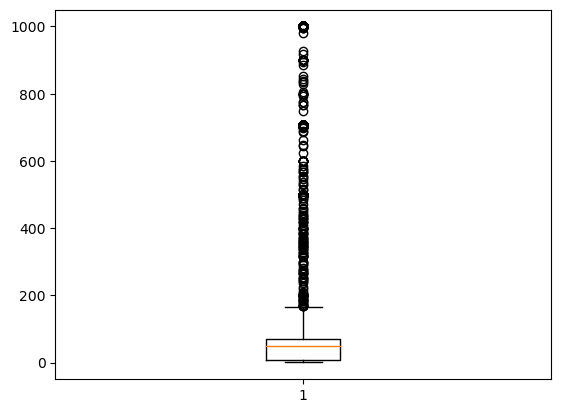

In [14]:
plt.boxplot(data_all['Coordinate uncertainty (m)']);

In [15]:
for i in range(200, 1050, 50):
    print(f"Количество записей, в которых погрешность более {i}м: {len(data_all[data_all['Coordinate uncertainty (m)'] > i])}")

Количество записей, в которых погрешность более 200м: 33119
Количество записей, в которых погрешность более 250м: 33109
Количество записей, в которых погрешность более 300м: 33095
Количество записей, в которых погрешность более 350м: 33077
Количество записей, в которых погрешность более 400м: 33055
Количество записей, в которых погрешность более 450м: 33044
Количество записей, в которых погрешность более 500м: 32534
Количество записей, в которых погрешность более 550м: 32527
Количество записей, в которых погрешность более 600м: 32512
Количество записей, в которых погрешность более 650м: 32509
Количество записей, в которых погрешность более 700м: 32495
Количество записей, в которых погрешность более 750м: 720
Количество записей, в которых погрешность более 800м: 709
Количество записей, в которых погрешность более 850м: 704
Количество записей, в которых погрешность более 900м: 690
Количество записей, в которых погрешность более 950м: 687
Количество записей, в которых погрешность более 10

In [16]:
data_all.drop(index=data_all[data_all['Coordinate uncertainty (m)'] > 750].index, inplace=True)

In [17]:
print(f"Количество записей в наборе данных: {data_all.shape[0]}")

Количество записей в наборе данных: 207628


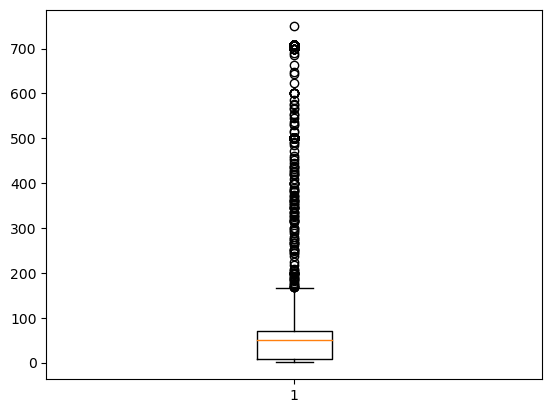

In [18]:
plt.boxplot(data_all['Coordinate uncertainty (m)']);

Избавился от аномально высоких показаний погрешности. Да, выбросы остались, но решение оставить некоторое количество записей с завышенными показаниями обусловлено тем, что удаление такого большого количества записей (примерно 30к) сильно урежет размер данных.

### 1.2.4 Неинформативные и избыточные признаки
Очевидно, что колонки (они же <i>атрибуты</i> или <i>признаки</i>), которые содержат всего одно значение, не дадут какого-либо прироста информации ни для модели машинного обучения, ни для вас как исследователя. Можно по каждому признаку пройтись и вызвать у него команду, которая показывает количество уникальных значений, но зачем, если можно <b>автоматизировать</b> отбор таких признаков.


In [19]:
useless_features = list() # так можно объявить пустой список
for column in data_all.columns:
    if len(data_all[column].unique()) == 1:
        useless_features.append(column)
        print(f"{column} has {len(data_all[column].unique())} уникальных значений: {data_all[column].unique()}")

Basis of record has 1 уникальных значений: ['HumanObservation']
Kingdom has 1 уникальных значений: ['Animalia']
Phylum has 1 уникальных значений: ['Chordata']
Class has 1 уникальных значений: ['Mammalia']
Country has 1 уникальных значений: ['United Kingdom']


На мой взгляд, результаты очевидны. Поскольку датасет посвящён млекопитающим, обитающим на территории Великобритании, информации о растениях мы в нём не встретим, поэтому царство всего одно -- Animalia. Это же касается и признаков Тип (Phylum) и Класс (Class), поскольку млекопитающие относятся к типу хордовых и классу млекопитающих в таксономической системе. <br>
Избавимся от этих признаков.

In [20]:
data_all.drop(columns=useless_features, inplace=True)
data_all.head(5)

Scientific name             Common name  Species ID (TVK) Taxon Rank  \
0   Capreolus capreolus                Roe Deer  NHMSYS0000080203    species   
1   Erinaceus europaeus  West European Hedgehog  NBNSYS0000005078    species   
3        Talpa europaea           European Mole  NBNSYS0000005079    species   
4  Sciurus carolinensis   Eastern Grey Squirrel  NHMSYS0000332764    species   
5        Talpa europaea           European Mole  NBNSYS0000005079    species   

   Start date  Start date day  Start date month  Start date year  \
0  31/01/2018              31                 1             2018   
1  20/01/2021              20                 1             2021   
3  25/01/2017              25                 1             2017   
4  06/01/2016               6                 1             2016   
5  18/01/2022              18                 1             2022   

   Latitude (WGS84)  Longitude (WGS84)  Coordinate uncertainty (m)  \
0         57.400200          -4.267900                        50.0   
1         51.519214          -0.738969                        57.0   
3         53.322473          -1.731987                        70.7   
4         52.581700          -1.717600                        50.0   
5         50.740415          -0.775410                        13.0   

  Identification verification status         Survey key         Order  \
0                 Accepted - correct  iRecord | Mammals  Artiodactyla   
1                 Accepted - correct      iRecord | App   Insectivora   
3                           Accepted   iRecord | Import   Insectivora   
4                           Accepted  iRecord | Mammals      Rodentia   
5      Accepted - considered correct      iRecord | App   Insectivora   

        Family      Genus State/Province  
0     Cervidae  Capreolus       Scotland  
1  Erinaceidae  Erinaceus        England  
3     Talpidae      Talpa        England  
4    Sciuridae    Sciurus        England  
5     Talpidae      Talpa        England

Обратим внимание на признаки Start date, Start date day, Start date month, Start date year -- информация в них несколько избыточна. Зачем иметь отдельные столбцы с частями даты начала наблюдения, если она уже есть в отдельном столбце, но в виде строки? Достаточно этот признак из типа object перевести в тип <b>datetime</b>, тогда появится возможность получить доступ к частям даты начала наблюдения "из коробки". Проделаем эти действия:

In [21]:
# удаляем избыточную информацию
data_all.drop(columns=['Start date day', 'Start date month', 'Start date year'], inplace=True)
# приводим признак Start date к типу datetime
data_all['Start date'] = pd.to_datetime(data_all['Start date'])
# проверяю, что получил
print(data_all['Start date'].dtype)
data_all.head(3)

datetime64[ns]


Scientific name             Common name  Species ID (TVK) Taxon Rank  \
0  Capreolus capreolus                Roe Deer  NHMSYS0000080203    species   
1  Erinaceus europaeus  West European Hedgehog  NBNSYS0000005078    species   
3       Talpa europaea           European Mole  NBNSYS0000005079    species   

  Start date  Latitude (WGS84)  Longitude (WGS84)  Coordinate uncertainty (m)  \
0 2018-01-31         57.400200          -4.267900                        50.0   
1 2021-01-20         51.519214          -0.738969                        57.0   
3 2017-01-25         53.322473          -1.731987                        70.7   

  Identification verification status         Survey key         Order  \
0                 Accepted - correct  iRecord | Mammals  Artiodactyla   
1                 Accepted - correct      iRecord | App   Insectivora   
3                           Accepted   iRecord | Import   Insectivora   

        Family      Genus State/Province  
0     Cervidae  Capreolus       Scotland  
1  Erinaceidae  Erinaceus        England  
3     Talpidae      Talpa        England

Это явно не всё. Существует ещё такое понятие как <b>техническая информация</b>. Техническая информация -- это всё, что даёт представление о носителе информации, но не об исследуемом объекте. Например, сейчас мы исследуем данные и хотим получить на их основе информацию о <b>млекопитающих</b>, но признаки Identification verification status, Survey key и Species ID (TVK), кажется, ничего не говорят о том, какое это млекопитающее, но несут информацию о том, как были собраны данные в том или ином случае. Исследуем эти признаки более подробно.

In [22]:
def feature_summary(df, column):
    print(column)
    print(f"Количество уникальных значений признака: {len(df[column].unique())}")
    print(f"Уникальные значения признака: {df[column].unique()}")
    print(f"Тип данных признака: {df[column].dtype}")
    print("-" * 20)

technical_features = ['Identification verification status', 'Survey key', 'Species ID (TVK)']
for feature in technical_features:
    feature_summary(data_all, feature)

Identification verification status
Количество уникальных значений признака: 3
Уникальные значения признака: ['Accepted - correct' 'Accepted' 'Accepted - considered correct']
Тип данных признака: object
--------------------
Survey key
Количество уникальных значений признака: 67
Уникальные значения признака: ['iRecord | Mammals' 'iRecord | App' 'iRecord | Import'
 'iRecord | General data' 'Wild Sheffield | General records'
 'Mammal Society | Mammal Atlas' 'iRecord | LERC Wales'
 'iRecord | Multi-site records'
 'iRecord | Moors for the Future Mountain Hare postcard'
 'MammalNet-Europe | IMammalia App' 'iRecord | National Trust Bioblitzes'
 'iRecord | ISpot' 'Merseyside BioBank | General records'
 'iRecord | App General Survey' 'NNSS | RISC Mammal'
 'Nature Counts - Nottinghamshire WT | General records' 'iRecord | Bats'
 'YWT INNS Mapper | Observations' 'UKBMS | Transects'
 'iRecord | National Trust for Scotland'
 "BRC website's forms | Mammal Atlas"
 'iRecord | National Trust Bioblitzes 2

Безусловно, это информация технического характера (метаданные). Однако глядя на них, тоже можно сделать выводы:
<ul>
    <li>Неподтверждённых записей в датасете нет (все они Accepted), можно избавиться;</li>
    <li>Признак Ключ опроса (Survey key) не несёт информации о млекопитающем, поскольку говорит о том, откуда получены данные,  можно избавиться;</li>
    <li>Признак Species ID (TVK) -- это идентификаторы каждого вида. От него пока избавляться не станем, исследуем дальше</li>
</ul>

In [23]:
data_all.drop(columns=['Identification verification status', 'Survey key'], inplace=True)

Чтобы исследовать идентификаторы видов, необходимо рассмотреть признаки, отвечающие за наименования видов. Их у нас два: Scientific name и Common name.

In [24]:
names_features = ['Scientific name', 'Common name']
for feature in names_features:
    feature_summary(data_all, feature)

Scientific name
Количество уникальных значений признака: 115
Уникальные значения признака: ['Capreolus capreolus' 'Erinaceus europaeus' 'Talpa europaea'
 'Sciurus carolinensis' 'Apodemus sylvaticus' 'Sciurus vulgaris'
 'Oryctolagus cuniculus' 'Mustela erminea' 'Myotis nattereri'
 'Muntiacus reevesi' 'Mustela nivalis' 'Lepus europaeus'
 'Rattus norvegicus' 'Lepus timidus' 'Lutra lutra' 'Micromys minutus'
 'Vulpes vulpes' 'Phoca vitulina' 'Plecotus' 'Arvicola amphibius'
 'Myodes glareolus' 'Felis silvestris x catus' 'Neovison vison'
 'Cervus elaphus' 'Meles meles' 'Microtus agrestis' 'Mus musculus'
 'Pipistrellus' 'Hydropotes inermis' 'Dama dama' 'Nyctalus noctula'
 'Plecotus auritus' 'Cervus nippon' 'Myotis' 'Sorex araneus'
 'Halichoerus grypus' 'Sorex minutus' 'Pipistrellus pipistrellus'
 'Pipistrellus pygmaeus' 'Muscardinus avellanarius'
 'Barbastella barbastellus' 'Lepus timidus subsp. scoticus'
 'Eptesicus serotinus' 'Apodemus flavicollis' 'Martes martes'
 'Neomys fodiens' 'Vesperti

Что видим: количество уникальных значений во всех трёх признаках не совпадает. Необходимо посмотреть, какое научное наименование какому обиходному наименованию и идентификатору соответствует. Можно попробовать сделать это через словарь, установив соответствие между каждым идентификатором и парой из научного и обиходного наименований млекопитающих.

In [25]:
# заведу пустой словарь
association_dict = {}
# в этом словаре ключами будут выступать идентификаторы
for id_tvk in data_all['Species ID (TVK)'].unique():
    temp_data = data_all[data_all['Species ID (TVK)'] == id_tvk]
    # добавляю запись словарь вида идентификатор: (научное имя, распространенное имя)
    association_dict[id_tvk] = (temp_data['Scientific name'].unique(),  temp_data['Common name'].unique())
# проверка на наличие в кортеже с именами случаев, где 
# какому-то идентификатору соответствует больше одного из наименований
for idx, names in association_dict.items():
    if len(association_dict[idx][0]) > 1 or len(association_dict[idx][1]) > 1:
        print(association_dict[idx])
else:
    print('Ничего не найдено')

Ничего не найдено


In [26]:
# разделим кортеж с наименованиями на два списка
scientific, common = [], []
for value in association_dict.values():
    scientific.append(value[0])
    common.append(value[1])
    
print("Длина первого списка: ", len(scientific))
print("Длина второго списка: ", len(common))

Длина первого списка:  116
Длина второго списка:  116


Посмотрим дубликаты среди обиходных наименований:

In [27]:
[element for element in common if common.count(element) > 1]

[array(['Stoat'], dtype=object),
 array(['Mountain Hare'], dtype=object),
 array(['Mountain Hare'], dtype=object),
 array(['Stoat'], dtype=object)]

Посмотрим дубликаты среди научных наименований:

In [28]:
[element for element in scientific if scientific.count(element) > 1]

[array(['Pipistrellus pipistrellus'], dtype=object),
 array(['Pipistrellus pipistrellus'], dtype=object)]

А теперь выведем записи с дублирующимся научным наименованием животного.

In [29]:
for idx, names in association_dict.items():
    if 'Pipistrellus pipistrellus' in names[0]:
        print(f"{idx} : {association_dict[idx]}")

NHMSYS0020001355 : (array(['Pipistrellus pipistrellus'], dtype=object), array(['Common Pipistrelle'], dtype=object))
NHMSYS0020001356 : (array(['Pipistrellus pipistrellus'], dtype=object), array(['Pipistrelle'], dtype=object))


Можно сделать вывод, что одному виду животного с научным наименованием Pipistrellus pipistrellus соответствуют два обиходных наименования 'Common Pipistrelle' и просто 'Pipistrelle'. Однако проверим, что указано для записей со значением 'Pipistrelle' в атрибуте Taxon Rank:

In [30]:
data_all[data_all['Common name'] == 'Pipistrelle']['Taxon Rank'].unique()

array(['species aggregate'], dtype=object)

Делаем вывод, что Pipistrelle -- это совокупность разных видов, а Common Pipistrelle -- это отдельный вид.
Лишними признаками здесь будут научное и обиходное названия млекопитающих в силу того, что среди них есть записи с дублирующимися значениями. Идентификаторы, используемые в атласе млекопитающих Великобритании, более точны и позволяют определить вид более точно.

In [31]:
# удаляю ненужные признаки
data_all.drop(columns=names_features, inplace=True)

In [32]:
data_all.head(3)

Species ID (TVK) Taxon Rank Start date  Latitude (WGS84)  \
0  NHMSYS0000080203    species 2018-01-31         57.400200   
1  NBNSYS0000005078    species 2021-01-20         51.519214   
3  NBNSYS0000005079    species 2017-01-25         53.322473   

   Longitude (WGS84)  Coordinate uncertainty (m)         Order       Family  \
0          -4.267900                        50.0  Artiodactyla     Cervidae   
1          -0.738969                        57.0   Insectivora  Erinaceidae   
3          -1.731987                        70.7   Insectivora     Talpidae   

       Genus State/Province  
0  Capreolus       Scotland  
1  Erinaceus        England  
3      Talpa        England

### 1.2.5 Остальные признаки

У нас остались неисследованными признаки Taxon Rank, Order, Family, Genus и State/Province. Посмотрим на признак Taxon Rank.

In [33]:
feature_summary(data_all, 'Taxon Rank')

Taxon Rank
Количество уникальных значений признака: 5
Уникальные значения признака: ['species' 'genus' 'species hybrid' 'subspecies' 'species aggregate']
Тип данных признака: object
--------------------


In [34]:
data_all['Taxon Rank'].value_counts()/data_all.shape[0] * 100

species              97.039898
genus                 1.608646
species aggregate     0.901131
subspecies            0.251411
species hybrid        0.198913
Name: Taxon Rank, dtype: float64

Видим, что есть несколько категорий у признака Taxon Rank, среди которых большую долю (97%) занимает категория species (виды). Помимо этой категории, встречаются записи, в которых ранг в таксономической системе -- род и обощённые виды, то есть не отдельный вид. Так как записей с такими категориями признака немного, их можно удалить. 

In [35]:
data_all.drop(index=data_all[(data_all['Taxon Rank'] == 'genus') | (data_all['Taxon Rank'] == 'species aggregate')].index, inplace=True)

Выделим отдельные атрибуты с таксономическими категориями и проанализируем их.

In [36]:
misunderstanded_features = ['Order', 'Family', 'Genus']
for feat in misunderstanded_features:
    feature_summary(data_all, feat)

Order
Количество уникальных значений признака: 10
Уникальные значения признака: ['Artiodactyla' 'Insectivora' 'Rodentia' 'Lagomorpha' 'Carnivora'
 'Chiroptera' 'Cetartiodactyla' 'Perissodactyla' 'Diprotodontia'
 'Primates']
Тип данных признака: object
--------------------
Family
Количество уникальных значений признака: 27
Уникальные значения признака: ['Cervidae' 'Erinaceidae' 'Talpidae' 'Sciuridae' 'Muridae' 'Leporidae'
 'Mustelidae' 'Vespertilionidae' 'Cricetidae' 'Canidae' 'Phocidae'
 'Felidae' 'Soricidae' 'Myoxidae' 'Delphinidae' 'Rhinolophidae' 'Suidae'
 'Castoridae' 'Bovidae' 'Phocoenidae' 'Physeteridae' 'Odobenidae'
 'Balaenopteridae' 'Equidae' 'Macropodidae' 'Hominidae' 'Ziphiidae']
Тип данных признака: object
--------------------
Genus
Количество уникальных значений признака: 63
Уникальные значения признака: ['Capreolus' 'Erinaceus' 'Talpa' 'Sciurus' 'Apodemus' 'Oryctolagus'
 'Mustela' 'Myotis' 'Muntiacus' 'Lepus' 'Rattus' 'Lutra' 'Micromys'
 'Vulpes' 'Phoca' 'Arvicola' 'Myode

Признаки можно оставить неизменёнными.

### 1.2.7 Кодирование категориальных переменных
Под <i>категориальными данными</i> мы понимаем данные, которые не имеют численного представления, они могут иметь как и два уникальных значения (бинарные признаки), так и более.
Для работы с признаками надо произвести <i>кодирование категориальных признаков</i> - процедуру, которая представляет собой некоторое преобразование категориальных признаков в численное представление по некоторым оговоренным ранее правилам.
Есть несколько возможностей для кодирования.

#### 1.2.7.1 Label encoder
Данный тип кодирования является наиболее часто используемым, преобразование представляет собой однозначное соответствие число <-> уникальное значение категориального признака.
Первое (выбранное каким-то образом) уникальное значение кодируется нулем, второе единицей, и так далее, последнее кодируется числом, равным количеству уникальных значений минус единица.

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_features = ['Taxon Rank', 'Order', 'Family', 'Genus', 'Species ID (TVK)', 'State/Province']
data_labled = data_all.copy()
for cat_feat in categorical_features:
    data_labled[cat_feat] = labelencoder.fit_transform(data_labled[cat_feat].values)
    print(labelencoder.classes_) # покажем, в каком порядке кодировались категории признака
data_labled

['species' 'species hybrid' 'subspecies']
['Artiodactyla' 'Carnivora' 'Cetartiodactyla' 'Chiroptera' 'Diprotodontia'
 'Insectivora' 'Lagomorpha' 'Perissodactyla' 'Primates' 'Rodentia']
['Balaenopteridae' 'Bovidae' 'Canidae' 'Castoridae' 'Cervidae'
 'Cricetidae' 'Delphinidae' 'Equidae' 'Erinaceidae' 'Felidae' 'Hominidae'
 'Leporidae' 'Macropodidae' 'Muridae' 'Mustelidae' 'Myoxidae' 'Odobenidae'
 'Phocidae' 'Phocoenidae' 'Physeteridae' 'Rhinolophidae' 'Sciuridae'
 'Soricidae' 'Suidae' 'Talpidae' 'Vespertilionidae' 'Ziphiidae']
['Apodemus' 'Arvicola' 'Balaenoptera' 'Barbastella' 'Bos' 'Canis' 'Capra'
 'Capreolus' 'Castor' 'Cervus' 'Crocidura' 'Dama' 'Delphinus' 'Eptesicus'
 'Equus' 'Erignathus' 'Erinaceus' 'Felis' 'Glis' 'Globicephala' 'Grampus'
 'Halichoerus' 'Homo' 'Hydropotes' 'Hyperoodon' 'Lagenorhynchus' 'Lepus'
 'Lutra' 'Macropus' 'Martes' 'Megaptera' 'Meles' 'Micromys' 'Microtus'
 'Muntiacus' 'Mus' 'Muscardinus' 'Mustela' 'Myodes' 'Myotis' 'Neomys'
 'Neovison' 'Nyctalus' 'Odobenus'

Species ID (TVK)  Taxon Rank Start date  Latitude (WGS84)  \
0                     60           0 2018-01-31         57.400200   
1                      0           0 2021-01-20         51.519214   
3                      1           0 2017-01-25         53.322473   
4                     73           0 2016-06-01         52.581700   
5                      1           0 2022-01-18         50.740415   
...                  ...         ...        ...               ...   
227317                 1           0 1972-05-21         50.676231   
227318                49           0 2013-04-05         50.953207   
227319                73           0 2017-05-26         52.038682   
227320                60           0 2022-05-26         53.518050   
227321                 6           0 2018-05-14         53.412563   

        Longitude (WGS84)  Coordinate uncertainty (m)  Order  Family  Genus  \
0               -4.267900                        50.0      0       4      7   
1               -0.738969                        57.0      5       8     16   
3               -1.731987                        70.7      5      24     59   
4               -1.717600                        50.0      9      21     56   
5               -0.775410                        13.0      5      24     59   
...                   ...                         ...    ...     ...    ...   
227317          -1.329116                       707.1      5      24     59   
227318          -0.138821                         7.1      1       2     61   
227319          -0.286097                         7.1      9      21     56   
227320          -2.566450                         5.0      0       4      7   
227321          -1.888709                         7.1      6      11     26   

        State/Province  
0                    3  
1                    0  
3                    0  
4                    0  
5                    0  
...                ...  
227317               0  
227318               0  
227319               0  
227320               0  
227321               0  

[202417 rows x 10 columns]

Главный недостаток Label Encoder'a - создание избыточных зависимостей в данных. После преобразования получилось, что в атрибуте State/Province значение Wales имеет численное значение 4, а Isle of Man  -- 1, что дает нам право говорить, что Wales в 4 раз больше (круче и тд.) чем Isle of Man по признаку State\Province. Однако, в исходных данных таких зависимостей не было, что и является существенным недостатком данного варианта кодирования.

#### 1.2.7.2 One-Hot Encoder
Данный тип кодирования, основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению. Проще говоря, на примере нашего признака State/Province, мы создаем бинарные признаки для всех уникальных значений: England, Northern Ireland, ..., где признак принадлежности к категории England имеет значение 1, если объект в признаке State/Province имеет значение England и нуль при всех других. Давайте посмотрим на примере признака State/Province:

In [38]:
data_ohe = data_all.copy()

data_new = pd.get_dummies(data_ohe, categorical_features)
data_new

Start date  Latitude (WGS84)  Longitude (WGS84)  \
0      2018-01-31         57.400200          -4.267900   
1      2021-01-20         51.519214          -0.738969   
3      2017-01-25         53.322473          -1.731987   
4      2016-06-01         52.581700          -1.717600   
5      2022-01-18         50.740415          -0.775410   
...           ...               ...                ...   
227317 1972-05-21         50.676231          -1.329116   
227318 2013-04-05         50.953207          -0.138821   
227319 2017-05-26         52.038682          -0.286097   
227320 2022-05-26         53.518050          -2.566450   
227321 2018-05-14         53.412563          -1.888709   

        Coordinate uncertainty (m)  Taxon Rank_NBNSYS0000005078  \
0                             50.0                            0   
1                             57.0                            1   
3                             70.7                            0   
4                             50.0                            0   
5                             13.0                            0   
...                            ...                          ...   
227317                       707.1                            0   
227318                         7.1                            0   
227319                         7.1                            0   
227320                         5.0                            0   
227321                         7.1                            0   

        Taxon Rank_NBNSYS0000005079  Taxon Rank_NBNSYS0000005081  \
0                                 0                            0   
1                                 0                            0   
3                                 1                            0   
4                                 0                            0   
5                                 1                            0   
...                             ...                          ...   
227317                            1                            0   
227318                            0                            0   
227319                            0                            0   
227320                            0                            0   
227321                            0                            0   

        Taxon Rank_NBNSYS0000005082  Taxon Rank_NBNSYS0000005102  \
0                                 0                            0   
1                                 0                            0   
3                                 0                            0   
4                                 0                            0   
5                                 0                            0   
...                             ...                          ...   
227317                            0                            0   
227318                            0                            0   
227319                            0                            0   
227320                            0                            0   
227321                            0                            0   

        Taxon Rank_NBNSYS0000005103  ...  Species ID (TVK)_Sus  \
0                                 0  ...                     0   
1                                 0  ...                     0   
3                                 0  ...                     0   
4                                 0  ...                     0   
5                                 0  ...                     0   
...                             ...  ...                   ...   
227317                            0  ...                     0   
227318                            0  ...                     0   
227319                            0  ...                     0   
227320                            0  ...                     0   
227321                            0  ...                     0   

        Species ID (TVK)_Talpa  Species ID (TVK)_Tursiops  \
0                

Главный недостаток One-Hot Encoder'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.

In [39]:
print(len(data_new.columns))
data_new.columns

209


Index(['Start date', 'Latitude (WGS84)', 'Longitude (WGS84)',
       'Coordinate uncertainty (m)', 'Taxon Rank_NBNSYS0000005078',
       'Taxon Rank_NBNSYS0000005079', 'Taxon Rank_NBNSYS0000005081',
       'Taxon Rank_NBNSYS0000005082', 'Taxon Rank_NBNSYS0000005102',
       'Taxon Rank_NBNSYS0000005103',
       ...
       'Species ID (TVK)_Sus', 'Species ID (TVK)_Talpa',
       'Species ID (TVK)_Tursiops', 'Species ID (TVK)_Vulpes',
       'Species ID (TVK)_Ziphius', 'State/Province_England',
       'State/Province_Isle of Man', 'State/Province_Northern Ireland',
       'State/Province_Scotland', 'State/Province_Wales'],
      dtype='object', length=209)

Есть и другие способы кодирования: https://habr.com/ru/articles/666234/

### 1.2.6 Визуализация данных для лучшего понимания данных

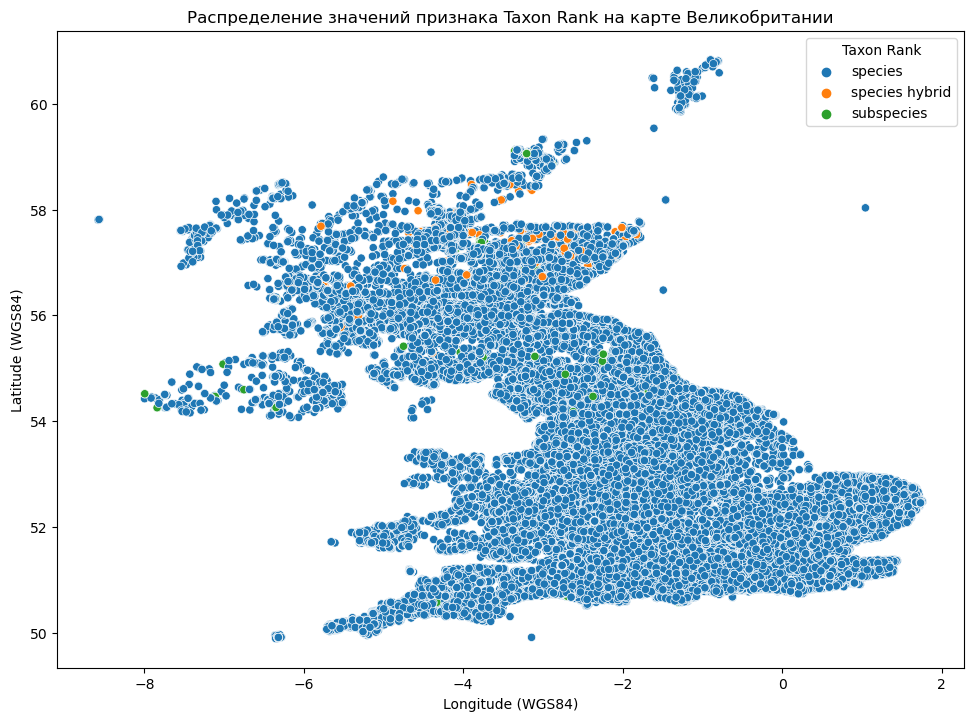

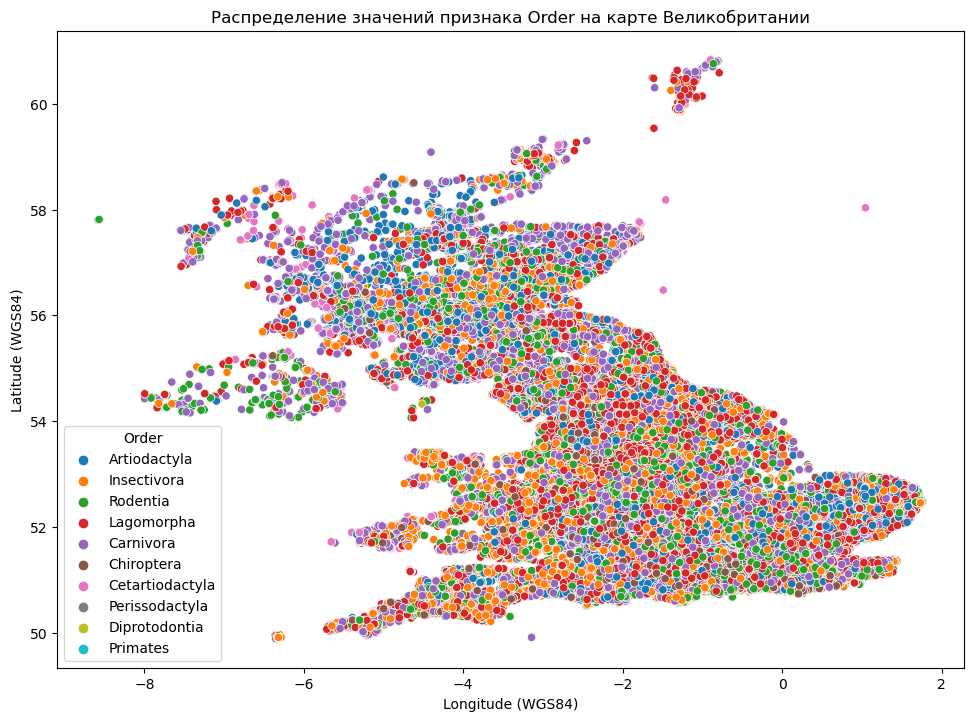

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


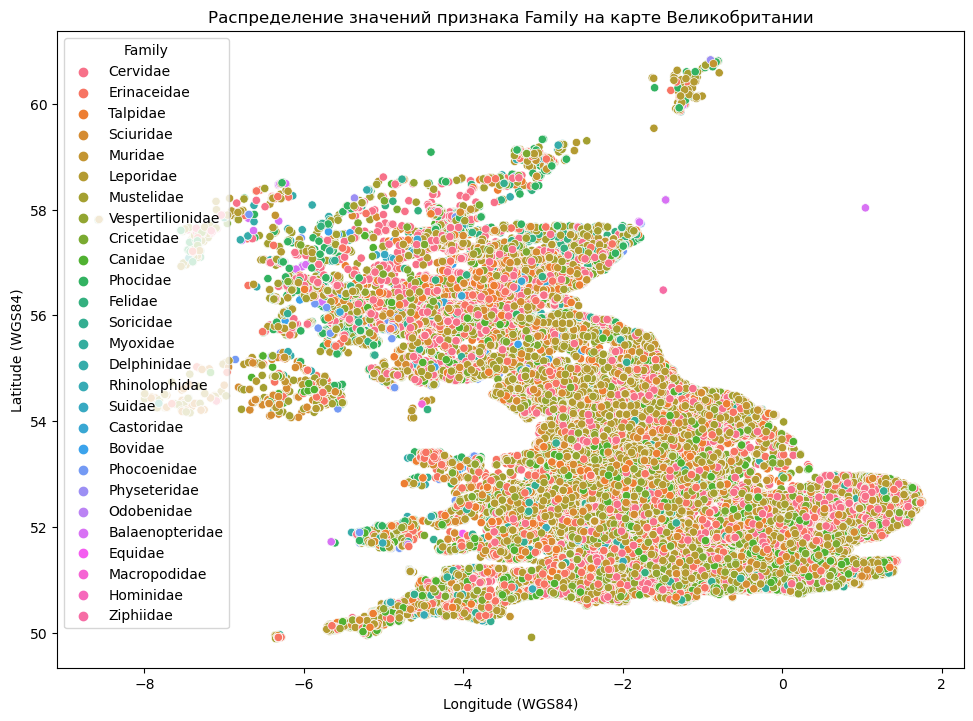

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


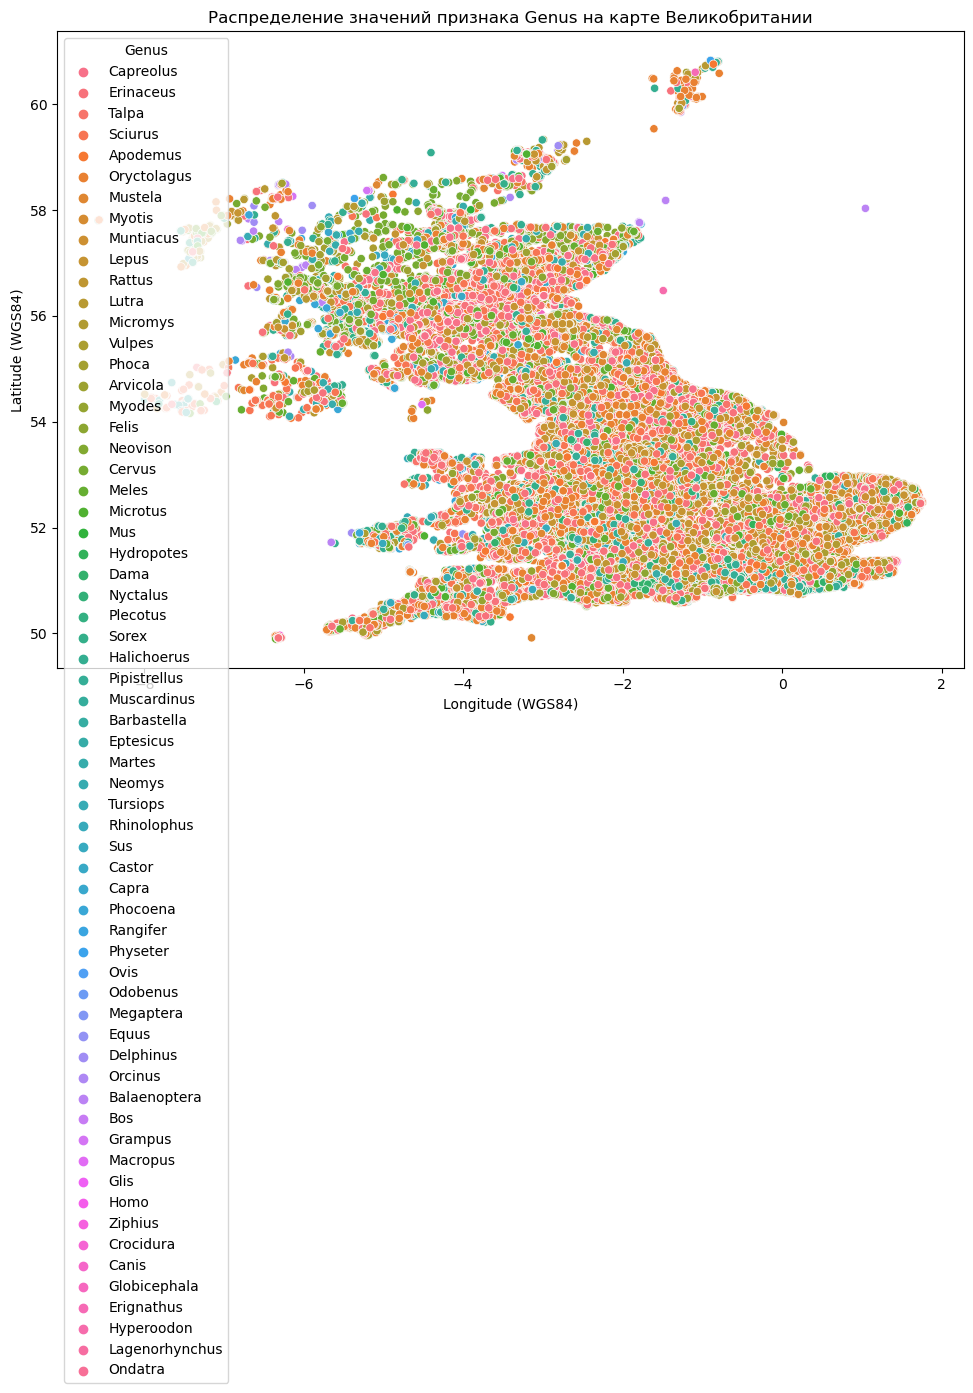

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


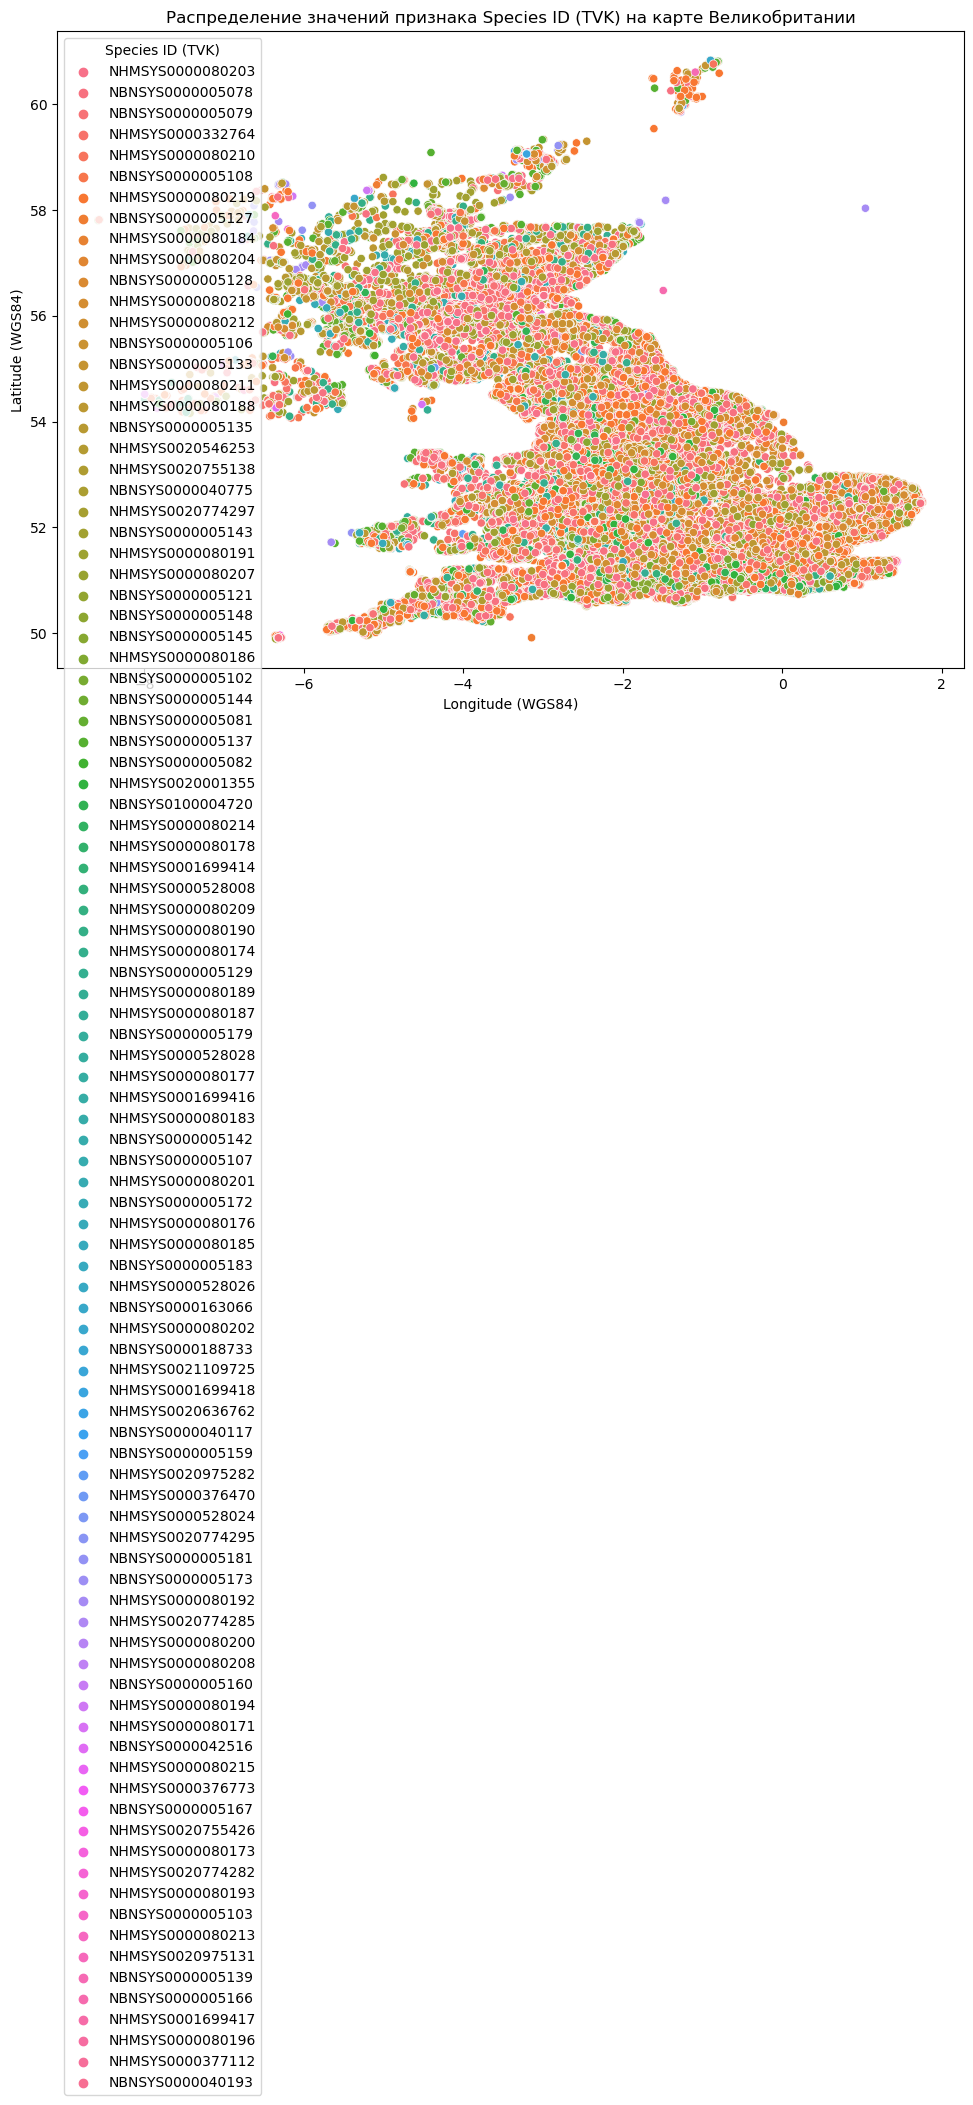

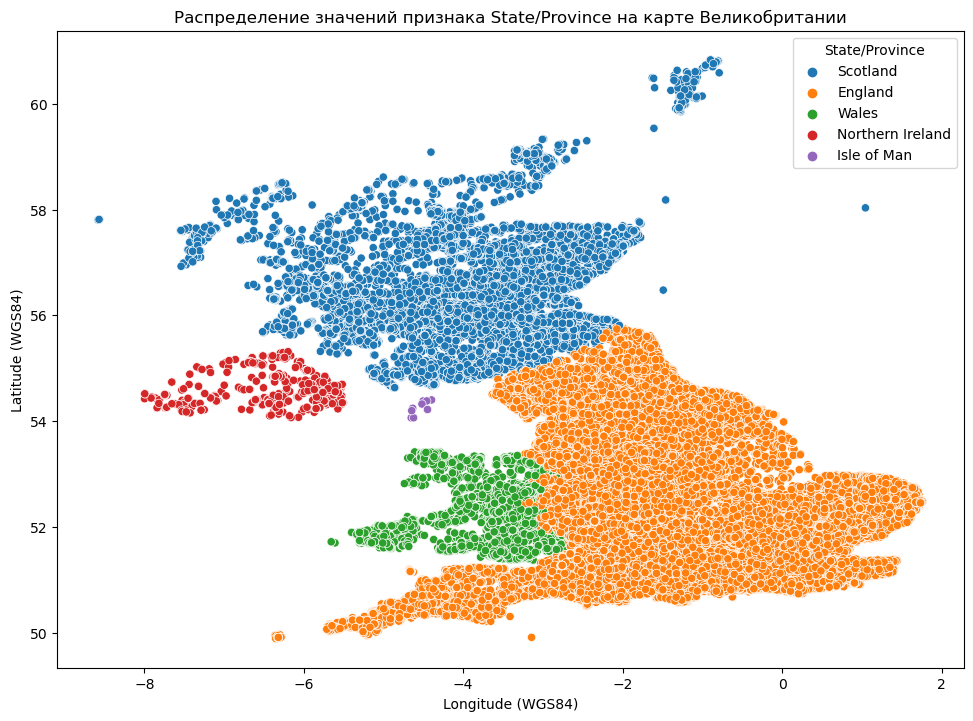

In [40]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

for feature in ['Taxon Rank', 'Order', 'Family', 'Genus', 'Species ID (TVK)', 'State/Province']:
    plt.title(f"Распределение значений признака {feature} на карте Великобритании")
    sns.scatterplot(data=data_all, x='Longitude (WGS84)', y='Latitude (WGS84)', hue=feature)
    #data_all.plot.scatter(x='Longitude (WGS84)', y='Latitude (WGS84)',
    #         c=feature, colormap='viridis', figsize=(6, 10),)
    plt.show();

In [1]:
!pip install nona

In [ ]:
from nona.nona import nona
nona(data_all)